 # Introdução à Programação Linear usando SciPy 

* O que é programação linear ?

A programação linear é técnica de modelagem matemática na qual uma função linear é maximizada ou minimizada quando submetida a várias restrições.As aplicações de programação linear estão por toda parte ao seu redor. Você usa programação linear em frentes pessoais e profissionais. Você está usando programação linear quando está dirigindo de casa para o trabalho e deseja seguir o caminho mais curto. Ou quando você tem uma entrega de projeto você faz estratégias para fazer sua equipe trabalhar de forma eficiente para entrega no prazo.


A solução de um problema de programação linear visa encontrar o valor ótimo maior ou menor, dependendo do problema da expressão linear chamada de função objetivo sujeita a um conjunto de restrições lineares de igualdade e/ou desigualdade.

# Terminologias comuns usadas em Programação Linear

* Variáveis ​​de Decisão:  As variáveis ​​de decisão são as variáveis ​​que decidirão a saida, elas representam a solução final. Para resolver qualquer problema, primeiro precisamos identificar as variáveis ​​de decisão. 

* Função Objetivo:  É definida como o objetivo de tomar decisões. Exemplo o lucro pode ser uma função objetivo.

* Restrições:  As restrições são as restrições ou limitações das variáveis ​​de decisão. Eles geralmente limitam o valor das variáveis ​​de decisão. 

* Restrição de não negatividade:  Para todos os programas lineares, as variáveis ​​de decisão devem sempre assumir valores não negativos. Isso significa que os valores das variáveis ​​de decisão devem ser maiores ou iguais a 0.




# Exemplo 01 de um problema de programação linear

Vamos começar com um exemplo simples:

Queremos encontrar a solução máxima para:

Z = 5x + 3y

Isso é conhecido como nossa função objetivo. x e y nesta equação são nossas variáveis de decisão.

Neste exemplo, a função objetivo está sujeita às seguintes restrições:

* x ≥ 0
* y ≥ 2
* 2a ≤ 25 - x
* 5a ≥ 2x - 8
* y ≤ 2x - 5

Começaremos representando graficamente este problema



 




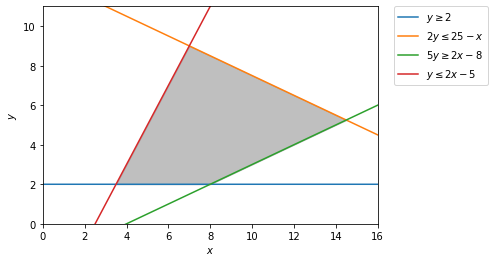

In [5]:
# CÓDIGO EM PYTHON


#importando as bibliotecas necessarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog # usamos a lineprog para minimizar uma função objetivo linear sujeita a restrições lineares de igualdade e desigualdade
from matplotlib.patches import Polygon
%matplotlib inline

# Construindo as linhas
# x > 0
x = np.linspace(0, 20, 2000) # retorna números com espaçamento uniforme em um intervalo especificado
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 5y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

# plotando o gráfico
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$5y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Preenchendo a região viável
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Portanto nossa solução está em algum lugar na região cinza viável no gráfico acima.

# Exemplo 02 - Problema de Produção

Suponha que uma indústria possa produzir dois chamados Produto 1 e Produto 2.

A produção de cada produto requer material e mão de obra.

Vender cada produto gera receita.

Os insumos e receitas necessários por unidade de material e mão de obra são mostrados na tabela abaixo:



40 unidades de material e 30 unidades de mão de obra disponíveis.


O problema de uma empresa é construir um plano de produção que use suas 40 unidades de materiais e 30 unidades de mão de obra para maximizar sua receita.

xi é a quantidade de Produto i que a empresa produz.

Este problema pode ser formulado com o seguinte modelo:

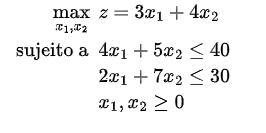

O gráfico a seguir ilustra as restrições da empresa e as linhas de iso-receita.

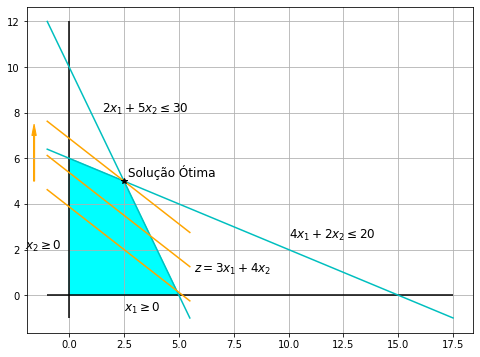

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Desenha linhas de restrição
ax.hlines(0, -1, 17.5)
ax.vlines(0, -1, 12)
ax.plot(np.linspace(-1, 17.5, 100), 6-0.4*np.linspace(-1, 17.5, 100), color="c")
ax.plot(np.linspace(-1, 5.5, 100), 10-2*np.linspace(-1, 5.5, 100), color="c")
ax.text(1.5, 8, "$2x_1 + 5x_2 \leq 30$", size=12)
ax.text(10, 2.5, "$4x_1 + 2x_2 \leq 20$", size=12)
ax.text(-2, 2, "$x_2 \geq 0$", size=12)
ax.text(2.5, -0.7, "$x_1 \geq 0$", size=12)

#  Desenha a região viável
viavel_set = Polygon(np.array([[0, 0], 
                                 [0, 6], 
                                 [2.5, 5], 
                                 [5, 0]]), 
                       color="cyan")
ax.add_patch(viavel_set)

# desenha a função objetivo
ax.plot(np.linspace(-1, 5.5, 100), 3.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 5.375-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 6.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.arrow(-1.6, 5, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="orange")
ax.text(5.7, 1, "$z = 3x_1 + 4x_2$", size=12)

# desenha a solução ótima
ax.plot(2.5, 5, "*", color="black")
ax.text(2.7, 5.2, "Solução Ótima", size=12)

plt.show()